In [1]:
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris_data = load_iris()
X, y = iris_data.data, iris_data.target
X_train, X_test ,y_train, y_test = train_test_split(X, y, train_size=0.7)


In [3]:
## Convertimos los datos en tensosres para pytorch
X_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.long)

In [4]:
## Neural network definition
## Usamos el modulo nn.Module de pytorch
# 3 capas
class FullyConnected(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(4,  64)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(64, 16)
        self.drop = nn.Dropout(0.2)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(16,3)
    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.drop(x)
        x = self.act2(x)
        x = self.l3(x)
        return x
    pass

        

In [5]:
 def fit(model):
        epochs = 400
        loss_arr = []
        loss_fn = nn.CrossEntropyLoss()
        optim = torch.optim.Adam(model.parameters(), lr=0.002)

        for epoch in range(epochs):
            ypred = model(X_tensor)
            loss = loss_fn(ypred, y_tensor)
            loss_arr.append(loss.item())
            loss.backward()
            optim.step()
            optim.zero_grad()
            print(f"Epoch {epoch} loss {loss}")
        plt.plot(loss_arr)
        plt.show()

Epoch 0 loss 1.138697862625122
Epoch 1 loss 1.1003895998001099
Epoch 2 loss 1.060754656791687
Epoch 3 loss 1.0393069982528687
Epoch 4 loss 1.0357446670532227
Epoch 5 loss 1.0166308879852295
Epoch 6 loss 1.0197185277938843
Epoch 7 loss 1.001724362373352
Epoch 8 loss 0.9865257740020752
Epoch 9 loss 0.9889649152755737
Epoch 10 loss 0.9664439558982849
Epoch 11 loss 0.9520372748374939
Epoch 12 loss 0.925475001335144
Epoch 13 loss 0.9205053448677063
Epoch 14 loss 0.9082838296890259
Epoch 15 loss 0.8881620764732361
Epoch 16 loss 0.8816913366317749
Epoch 17 loss 0.8637027740478516
Epoch 18 loss 0.8849284648895264
Epoch 19 loss 0.8360678553581238
Epoch 20 loss 0.8144352436065674
Epoch 21 loss 0.8543753027915955
Epoch 22 loss 0.8139002919197083
Epoch 23 loss 0.8060917258262634
Epoch 24 loss 0.7851288318634033
Epoch 25 loss 0.785374641418457
Epoch 26 loss 0.7769144177436829
Epoch 27 loss 0.7380222082138062
Epoch 28 loss 0.7181519269943237
Epoch 29 loss 0.7102543711662292
Epoch 30 loss 0.683735311

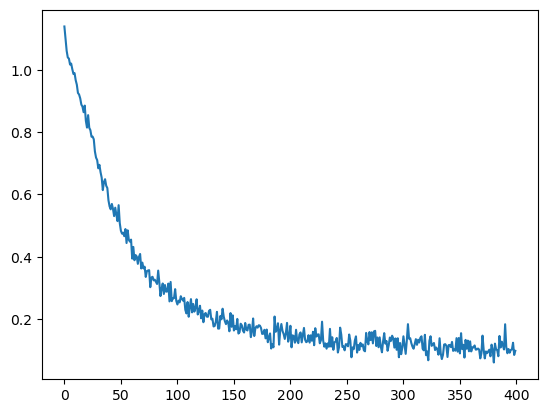

In [6]:
model = FullyConnected()
fit(model)

In [7]:
# Transformamos el array de test en tensor

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_predict= model(X_test_tensor)
test = torch.argmax(y_test_predict, dim=1)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy: ", accuracy_score(test.cpu(), y_test))
print("Confusion Matrix:\n", confusion_matrix(test.cpu(), y_test))

Accuracy:  0.9777777777777777
Confusion Matrix:
 [[18  0  0]
 [ 0 15  0]
 [ 0  1 11]]
